# Double Descent In Polynomial Fitting

Conventional wisdom in machine learning tells us that test error follows a U-curve as model flexibility goes up. The rise in error after reaching the bottom of the U-curve is called in machine learning literature as "overfitting."

A phenomenon popularly observed in neural networks that have more parameters than datapoints (overparameterized) is "double descent" that on the surface seems to defy the conventional wisdom. If we increase the model flexibility (more parameters) further, we may see a second decline in the test error, hence the term "double descent." How is this so?

For one, the number of parameters in neural networks does not necessarily translate to model complexity. In fact, models with far more parameters can be effectively simpler than those with fewer parameters! (https://arxiv.org/abs/2503.02113)

Overflexible models, while they have the capacity to adapt to learn highly complicated functions, do not need to be overly complicated when fit on the data - the model can still end up learning an effectively simpler function.

Double descent is not specific to neural networks. In fact, it has been observed even in linear models. Here, we experiment on a simple polynomial regression and find that the double descent phenomenon can arise (though a rudimentary version).

The test error ended up peaking at polynomial order 41, after which we see a decline in the test error (double descent). Visualizing the learned function, we see that at order 41, the polynomial is very erratic. But at order 45, the polynomial became visibly smoother despite being more flexible.

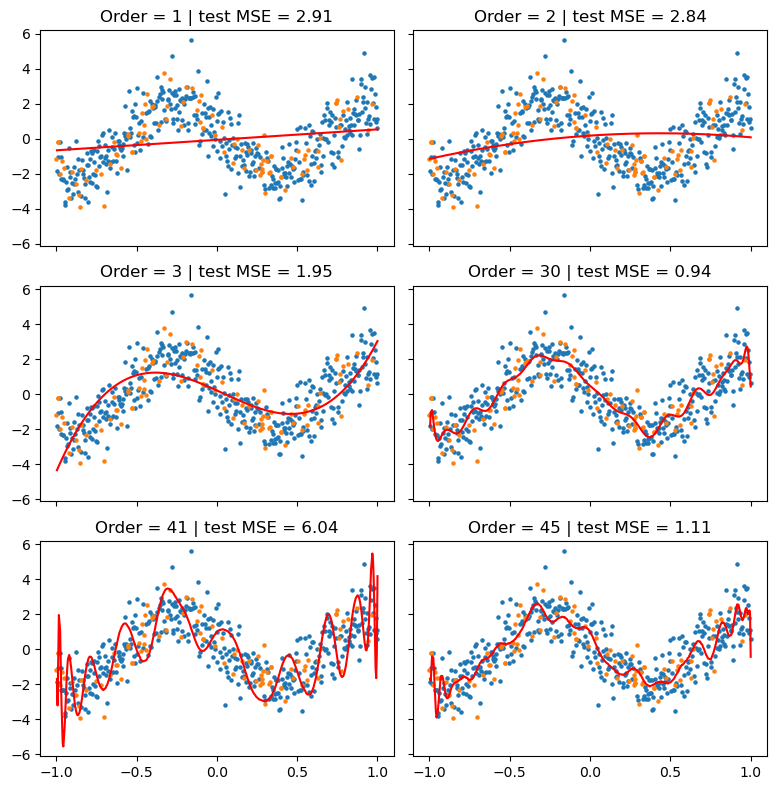

In [177]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Sample data
np.random.seed(42)
X = np.linspace(-1, 1, 500)
y =  2 * np.cos(X*5 - 5) + np.random.normal(0, 1, size=len(X))

count_test = 100
test_inds = sorted(np.random.randint(0, len(X), size=count_test))
train_inds = sorted(list(set(range(len(X))) - set(test_inds)))

X_train = X[train_inds]
X_test = X[test_inds]

y_train = y[train_inds]
y_test = y[test_inds]

test_mses = []
train_mses = []
degrees = range(1, 50, 1)
# Polynomial transformation
fig, axs = plt.subplots(3, 2, figsize=(8, 8), sharey=True, sharex=True)
axs = axs.flatten()
i = 0
for degree in degrees:
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X_train.reshape(-1, 1))

    # Train model
    model = LinearRegression().fit(X_poly, y_train)

    # Prediction
    y_pred_train = model.predict(X_poly)
    train_mse = np.mean((y_train - y_pred_train)**2)
    train_mses += [train_mse]

    X_poly_test = poly.transform(X_test.reshape(-1, 1))
    y_pred_test = model.predict(X_poly_test)
    
    test_mse = np.mean((y_test - y_pred_test)**2)
    test_mses += [test_mse]

    if degree in [1, 2, 3, 30, 41, 45]:
        axs[i].scatter(X_train, y_train, s=5)
        axs[i].scatter(X_test, y_test, s=5)
        axs[i].plot(X_train, y_pred_train, c='r')
        axs[i].set_title(f"Order = {degree} | test MSE = {test_mse:.2f}")
        i += 1

plt.tight_layout()

Text(0.5, 1.0, 'Rudimentary double descent phenomenon')

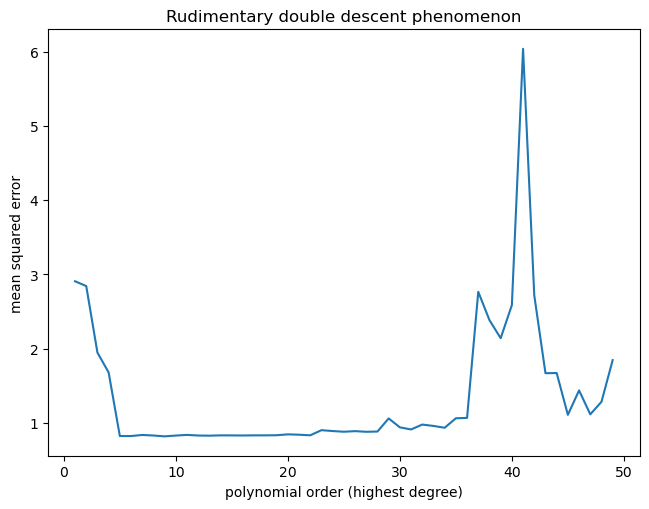

In [168]:
plt.plot(degrees, test_mses)
plt.tight_layout()
plt.xlabel("polynomial order (highest degree)")
plt.ylabel("mean squared error")
plt.title("Rudimentary double descent phenomenon")